# Análisis de Componentes Principales 
## Callejas Hernández Edgar 


### Cuando trabajamos con datos (Muestras) casi siempre hay variables redundantes, es decir que no aportan información. 

### Por lo anterior es necesario reducir la dimiensión de nuestros datos y tener la mayor variabilidad de estos para lograr mejores estimadores .

### Un método lineal que reduce la dimensión de nuestros datos es PCA (Principal Componet Analysis), el cuál se centra en maximizar la varianza con el uso de los eigenvalores y eigenvectores de la matriz de covarianzas.


### En este ejemplo se utiliza un conjunto de datos **Metales Fetales** que representan diferentes mediciones de metales en la sangre durante el periodo fetal.

In [40]:
# Importamos librerias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Cargamos los datos 
df = pd.read_excel('./tarea1-cp-metales-fetales.xlsx',usecols="E:L,N:V")
df.head(3)

,PL Pb [ng/g],PL Mn [ng/g],PL Cd [ng/g],PL As [ng/g],BPb [ug/dL],BMn [ug/dL],BCd [ug/dL],BAs [ug/dL],BMg[µg/dL],BAl[µg/dL],BV[µg/dL],BCr[µg/dL],BCo[µg/dL],BNi[µg/dL],BCu[µg/dL],BZn[µg/dL],BSe[µg/dL]
0,8.875241,46.442662,7.194834,1.556906,7.806534,4.773283,0.012932,0.046794,3596.694633,2.346228,0.031981,0.167212,0.041849,0.341802,84.404811,226.164258,21.149364
1,2.659360,34.241819,0.748142,1.214379,1.235290,7.649825,0.001257,0.028550,4523.072275,0.940128,0.027551,0.059222,0.016790,0.109660,87.327431,258.080366,23.418651
2,3.499838,35.432407,0.593696,1.555543,0.943575,1.621677,0.052983,0.072513,4802.405469,4.883834,0.134427,0.316678,0.111323,0.873659,92.256077,368.302296,15.395020


In [42]:
# Quitamos las filas que no tienen información 
cleanData=df.dropna(axis=0)

In [43]:
# Estandarizamos los datos 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(cleanData.values)

Calculamos la matriz de covarianzas, asi como sus  eigenvalores y eigenvectores

$C_{X} = \frac{1}{n}XX^T$

In [44]:
cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals:\n', eigen_vals)

Eigenvals:
 [6.14682004e+00 4.17060541e+00 1.97687259e+00 1.57143330e+00
 1.09032444e+00 9.36462572e-01 5.49702300e-01 3.28689011e-01
 2.36832709e-01 1.89051085e-01 1.09861011e-03 2.94706704e-02
 2.07954538e-02 6.27571448e-02 5.88814026e-02 1.21711618e-01
 1.38121272e-01]


In [45]:
tot = sum(eigen_vals)
print('Suma total de los eigenvalores = ',tot)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
eigen_par = [(np.abs(eigen_vals[i]),eigen_vecs[i])
            for i in range(len(eigen_vals))]
eigen_par.sort(key=lambda k: k[0], reverse=True)

Suma total de los eigenvalores =  17.62962962962963


In [46]:
# Seleccionamos la primeras N Componentes principales 
NPComponents = 2
listaEP = [eigen_par[i][1][:,np.newaxis] for i in range(NPComponents)]
p = np.hstack( listaEP )
print('p = \n', p)

p = 
 [[ 0.29772652  0.22542213]
 [-0.25595255 -0.28698084]
 [-0.22823357 -0.30738226]
 [ 0.06801087  0.02947889]
 [-0.09994176 -0.26790631]
 [-0.18384556 -0.20489034]
 [-0.15550504 -0.01547291]
 [ 0.17336365 -0.03301082]
 [-0.21448519  0.24008141]
 [ 0.03742813  0.13004694]
 [-0.13879198  0.08317655]
 [ 0.47531955 -0.30474132]
 [-0.01720471 -0.03164328]
 [-0.59129684  0.19325811]
 [-0.2075706  -0.30436986]
 [ 0.0739466  -0.23496672]
 [-0.0053471   0.54392441]]


In [47]:
print('Primera muestra original de dimensión 17: \n', X_std[0])
print('Primera muestra proyectada en una dimensión 2: \n', X_std[0].dot(p))

Primera muestra original de dimensión 17: 
 [-1.16804310e-01  2.18601150e-01  3.42715708e+00  1.19105177e-01
  2.47215986e+00 -1.99034034e-01  2.91075111e-01 -2.70889891e-02
 -5.79254987e-01 -3.33169904e-01 -3.84817154e-01  2.97724484e-01
  2.01200614e-03  3.73597528e-01  4.53195364e-01 -1.54026322e-01
 -1.57367808e-01]
Primera muestra proyectada en una dimensión 2: 
 [-1.14412394 -2.1844773 ]


In [48]:
X_pca = X_std.dot(p)
print('Datos reducidos de 17 a 2 dimensiones:\n',X_pca)

Datos reducidos de 17 a 2 dimensiones:
 [[-1.14412394 -2.1844773 ]
 [-0.33112563  0.45180157]
 [-0.67221778 -0.2915653 ]
 [-0.05912027  0.71285251]
 [-0.18215846  0.74847886]
 [ 0.58289595  0.87754613]
 [ 0.25150307  0.28731317]
 [-0.47237889  0.80252585]
 [ 0.38876562 -1.67802563]
 [-0.17109532  0.23747262]
 [-0.13168891  0.2736237 ]
 [-0.26315901  0.36925428]
 [-1.4286741  -2.22763128]
 [ 0.18141665  0.75433863]
 [ 0.49162185  1.33164765]
 [ 0.45264127  0.25244377]
 [-0.39269111 -2.6078842 ]
 [ 0.12814959 -0.67367012]
 [ 0.46506723  0.55708418]
 [-0.15471254  0.56648498]
 [-0.10469001 -0.54292278]
 [ 1.39716798 -0.11394906]
 [-0.99544459  0.2659647 ]
 [ 0.22017829  0.72180567]
 [ 1.09627251  0.52373434]
 [ 0.46343018 -0.27260051]
 [ 0.60466256  0.07320565]
 [-0.2204922   0.7851479 ]]


Text(0.5, 1.0, 'Datos proyectados en una dimensión de 2')

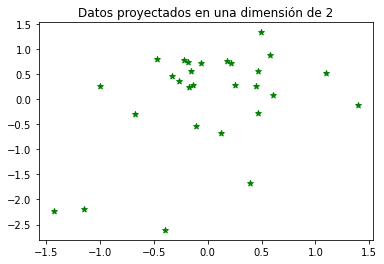

In [49]:
plt.scatter(X_pca[:,0],X_pca[:,1],c='green',marker='*')
plt.title('Datos proyectados en una dimensión de 2')

### En conclusión, este método reduce la dimensionalidad pero no nos dice que variables originales son, por lo que no podemos dar un nombre a las nuevas variables. 